In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    
#model_selection: module that contains functions related to splitting data 
#train_test_split → function to split data into training and test (or validation) sets.

from sklearn.preprocessing import StandardScaler, LabelEncoder 
#StandardScaler → tool to scale numerical features (subtract mean, divide by std).
#LabelEncoder: tool to convert labels from text (e.g. "healthy") to integers (e.g. 2).

In [ ]:
#Defind path and load data

DATA_PATH = "../data/daily_aggregates_obese_20_1year_sdv.csv"

dataTable = pd.read_csv(DATA_PATH)

dataTable.head() #Show first 5 rows

,sdv_user_id,Timestamp,steps,steps_goal,avg_heart_rate,max_heart_rate,minutes_moderate,minutes_vigorous,weight_kg,activity_label
0,1001,2023-01-01 00:00:00,26971,11328,77.1,127,105,65,119.4,over_exercise
1,1001,2023-01-02 00:00:00,18270,9008,76.1,131,110,25,119.4,energetic
2,1001,2023-01-03 00:00:00,14141,10292,75.5,112,135,0,119.3,energetic
3,1001,2023-01-04 00:00:00,22327,11820,77.1,122,195,15,119.3,energetic
4,1001,2023-01-05 00:00:00,28390,11689,76.9,125,70,70,119.2,over_exercise


In [8]:
#Cell 3 – Check basic info & missing values
dataTable.info()

dataTable.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sdv_user_id       7300 non-null   int64  
 1   Timestamp         7300 non-null   object 
 2   steps             7300 non-null   int64  
 3   steps_goal        7300 non-null   int64  
 4   avg_heart_rate    7300 non-null   float64
 5   max_heart_rate    7300 non-null   int64  
 6   minutes_moderate  7300 non-null   int64  
 7   minutes_vigorous  7300 non-null   int64  
 8   weight_kg         7300 non-null   float64
 9   activity_label    7300 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 570.4+ KB


,sdv_user_id,steps,steps_goal,avg_heart_rate,max_heart_rate,minutes_moderate,minutes_vigorous,weight_kg
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,1010.500000,24572.783288,9859.267397,75.849027,120.881096,130.382192,26.495890,104.875438
std,5.766676,15879.097739,3503.769155,3.586675,8.007350,50.817045,34.347728,13.092179
min,1001.000000,1302.000000,3006.000000,63.400000,86.000000,0.000000,0.000000,77.000000
25%,1005.750000,13472.750000,7218.750000,73.400000,117.000000,95.000000,0.000000,93.800000
50%,1010.500000,21983.500000,9992.000000,76.600000,123.000000,130.000000,10.000000,108.000000
75%,1015.250000,31648.750000,11783.000000,78.600000,127.000000,160.000000,40.000000,113.800000
max,1020.000000,112174.000000,17999.000000,85.100000,139.000000,340.000000,210.000000,131.400000


In [9]:
#Look at unique labels
dataTable["activity_label"].value_counts()


activity_label
energetic        3865
over_exercise    2227
healthy           905
low_activity      303
Name: count, dtype: int64

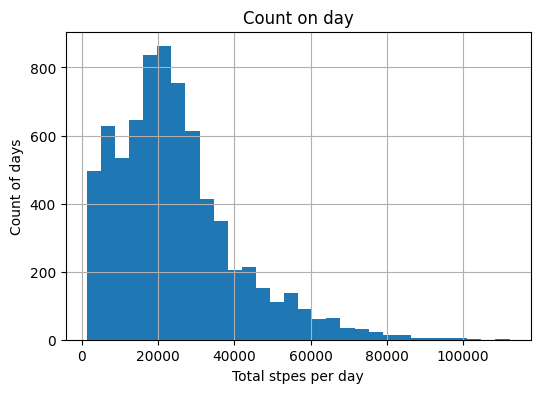

In [10]:
#Simple plot: distribution of total_steps

plt.figure(figsize=(6,4))
dataTable["steps"].hist(bins=30)
plt.xlabel("Total stpes per day")
plt.ylabel("Count of days")
plt.title("Count on day")
plt.show()



In [11]:
dataTable[["steps", "avg_heart_rate", "weight_kg"]].corr()

#from the correlation, we can see that The relation between total_steps and avg_heart_rate is opposite, 
#there is ligh relation between weight and total steps
#And the relationship of hr and wweigh is corresponding, The heavier the person, the higher their average heart rate tends to be.

,steps,avg_heart_rate,weight_kg
steps,1.000000,-0.096985,-0.476225
avg_heart_rate,-0.096985,1.000000,0.222285
weight_kg,-0.476225,0.222285,1.000000


In [14]:
#Choose Feature and Target 

feature_cols = ["steps",
    "steps_goal",
    "avg_heart_rate",
    "max_heart_rate",
    "minutes_moderate",
    "minutes_vigorous",
    "weight_kg",]

target_col = "activity_label"

x = dataTable[feature_cols].copy()
y = dataTable[target_col].copy()

x.head()
y.head()

0    over_exercise
1        energetic
2        energetic
3        energetic
4    over_exercise
Name: activity_label, dtype: object

In [ ]:
#STEP 3.1: Encode label
from sklearn.preprocessing import LabelEncoder

# Create the encoder
label_encoder = LabelEncoder()

# Fit encoder on existing labels and transform y into numeric values
y_encoded = label_encoder.fit_transform(y)

# Check mapping from numbers back to original labels
class_names = label_encoder.classes_
class_names, y_encoded[:10]


c:\INHOLLAND UNIVERSITY\Internship Third Year\Project\.venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.1, 0.3, 0.5], dtype=float32), array([0, 1, 2], dtype=int64))

In [ ]:
#Srep 3.2: Split into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x,
    y_encoded,
    test_size = 0.2,
    random_state=42,
    stratify = y_encoded #keep balance between the healthy, overtrain, lazy label.
)

x_train.shape, x_val.shape, y_train.shape, y_val.shape


((5840, 7), (1460, 7), (5840,), (1460,))

In [ ]:
#Steps 3.3: scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.fit_transform(x_val)

x_train_scaled[:3]

array([[-0.73208712, -1.66182166, -0.04030689, -0.86161841,  0.1888811 ,
        -0.77076852,  0.29629355],
       [-1.10653215, -0.98501288,  1.07252711, -0.23501805, -0.79354285,
        -0.77076852,  0.49445598],
       [-0.67192086, -0.34013442, -0.73582813, -1.61353884, -0.49881567,
        -0.77076852,  0.63926699]])

In [31]:
#STEP 4.1 
#Pytorch Import

import torch 
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# 1) Convert X (features) to float32 tensors
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val_scaled, dtype = torch.float32)

# 2) Convert y (labels) to long tensors (integers)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# 3) Check shapes and dtypes
print("x_train_tensor:", x_train_tensor.shape, x_train_tensor.dtype)
print("y_train_tensor:", y_train_tensor.shape, y_train_tensor.dtype)


x_train_tensor: torch.Size([5840, 7]) torch.float32
y_train_tensor: torch.Size([5840]) torch.int64


In [ ]:
#Create Dataset and dataloadder 
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(x_val_tensor,   y_val_tensor)

#create dataloader objects for batching
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True  # shuffle training data each epoch
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False  # no need to shuffle validation data
)

len(train_loader), len(val_loader)

(92, 23)

In [34]:
input_dim  = x_train_tensor.shape[1]   # number of features (should be 7)
num_classes = len(class_names)         # number of labels

class ActivityNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ActivityNet, self).__init__()
        
        # First hidden layer: input_dim -> 32 neurons
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu1 = nn.ReLU()
        
        # Second hidden layer: 32 -> 16 neurons
        self.fc2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        
        # Output layer: 16 -> num_classes
        self.out = nn.Linear(16, num_classes)
    
    def forward(self, x):
        # Pass through first layer + activation
        x = self.fc1(x)
        x = self.relu1(x)
        
        # Second layer + activation
        x = self.fc2(x)
        x = self.relu2(x)
        
        # Output layer (logits, no softmax here)
        x = self.out(x)
        return x

# 2) Create an instance of the model
model = ActivityNet(input_dim, num_classes)
model


ActivityNet(
  (fc1): Linear(in_features=7, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (out): Linear(in_features=16, out_features=4, bias=True)
)

In [ ]:
#Step 5
#Step 5.1:  Tensor and DataLoaders
#create tensors and loaders

import torch
from torch.utils.data import TensorDataset, DataLoader

# 1) Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train,        dtype=torch.long)

X_val_tensor   = torch.tensor(x_val_scaled,   dtype=torch.float32)
y_val_tensor   = torch.tensor(y_val,          dtype=torch.long)

# 2) Wrap tensors into TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor,   y_val_tensor)

# 3) Create DataLoader for batching & shuffling
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)



In [37]:
#Step 5.2: Los Function and Optimizer
#Cell: define training components

import torch.nn as nn
import torch.optim as optim

# 1) Device: use GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 2) Move model to device
model.to(device)

# 3) Define loss function (criterion) and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



Using device: cuda


In [39]:
#Step 5.3 – Training + Validation Loop
#Cell: full training loop
num_epochs = 30  # you can adjust this later

for epoch in range(num_epochs):
    # -------------------------
    # TRAINING PHASE
    # -------------------------
    model.train()  # set model to training mode
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader:
        # Move batch to device
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        # 1) Reset gradients from previous step
        optimizer.zero_grad()
        
        # 2) Forward pass: compute model outputs
        outputs = model(batch_X)
        
        # 3) Compute loss between outputs and true labels
        loss = criterion(outputs, batch_y)
        
        # 4) Backward pass: compute gradients
        loss.backward()
        
        # 5) Update weights
        optimizer.step()
        
        # 6) Track training loss
        running_loss += loss.item() * batch_X.size(0)
        
        # 7) Compute training accuracy
        _, predicted = torch.max(outputs, dim=1)  # index of max logit
        correct += (predicted == batch_y).sum().item()
        total   += batch_y.size(0)
    
    epoch_train_loss = running_loss / total
    epoch_train_acc  = correct / total
    
    # -------------------------
    # VALIDATION PHASE
    # -------------------------
    model.eval()  # set model to eval mode (no dropout, etc.)
    
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            val_loss += loss.item() * batch_X.size(0)
            
            _, predicted = torch.max(outputs, dim=1)
            val_correct += (predicted == batch_y).sum().item()
            val_total   += batch_y.size(0)
    
    epoch_val_loss = val_loss / val_total
    epoch_val_acc  = val_correct / val_total
    
    # -------------------------
    # PRINT EPOCH SUMMARY
    # -------------------------
    print(
        f"Epoch [{epoch+1}/{num_epochs}] "
        f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f} "
        f"| Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.4f}"
    )



Epoch [1/30] Train Loss: 1.1477 | Train Acc: 0.5978 | Val Loss: 0.7761 | Val Acc: 0.7747
Epoch [2/30] Train Loss: 0.5290 | Train Acc: 0.7930 | Val Loss: 0.3862 | Val Acc: 0.8021
Epoch [3/30] Train Loss: 0.3325 | Train Acc: 0.8505 | Val Loss: 0.2820 | Val Acc: 0.8829
Epoch [4/30] Train Loss: 0.2605 | Train Acc: 0.8973 | Val Loss: 0.2310 | Val Acc: 0.9130
Epoch [5/30] Train Loss: 0.2238 | Train Acc: 0.9103 | Val Loss: 0.2029 | Val Acc: 0.9226
Epoch [6/30] Train Loss: 0.2010 | Train Acc: 0.9231 | Val Loss: 0.1837 | Val Acc: 0.9308
Epoch [7/30] Train Loss: 0.1870 | Train Acc: 0.9271 | Val Loss: 0.1721 | Val Acc: 0.9418
Epoch [8/30] Train Loss: 0.1757 | Train Acc: 0.9289 | Val Loss: 0.1609 | Val Acc: 0.9418
Epoch [9/30] Train Loss: 0.1679 | Train Acc: 0.9348 | Val Loss: 0.1550 | Val Acc: 0.9425
Epoch [10/30] Train Loss: 0.1597 | Train Acc: 0.9356 | Val Loss: 0.1491 | Val Acc: 0.9438
Epoch [11/30] Train Loss: 0.1541 | Train Acc: 0.9384 | Val Loss: 0.1428 | Val Acc: 0.9452
Epoch [12/30] Train

In [40]:
#STEP 6 — Model Evaluation & Accuracy Breakdown
#Step 6.1 Overall Accuracy on Validation Set
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_X)

        # predicted = index of max logit
        _, predicted = torch.max(outputs, dim=1)

        correct += (predicted == batch_y).sum().item()
        total   += batch_y.size(0)

val_accuracy = correct / total
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.9636986301369863


In [41]:
#STEP 6.2 — Accuracy Per Class

from collections import defaultdict

model.eval()

class_correct = defaultdict(int)
class_total   = defaultdict(int)

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_X)
        _, predicted = torch.max(outputs, dim=1)

        for true, pred in zip(batch_y, predicted):
            label_name = class_names[true.item()]
            class_total[label_name] += 1
            
            if true.item() == pred.item():
                class_correct[label_name] += 1

for label in class_names:
    accuracy = class_correct[label] / class_total[label]
    print(f"{label}: {accuracy:.4f}")


energetic: 0.9715
healthy: 0.9116
low_activity: 0.7869
over_exercise: 0.9955


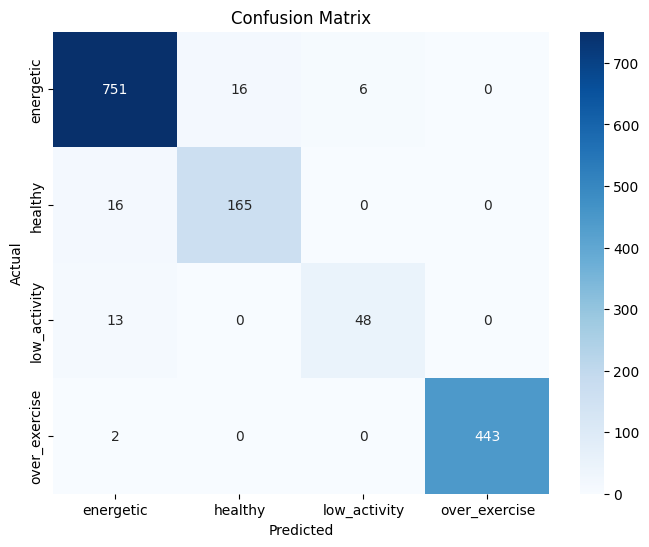

In [42]:
#STEP 6.3 — Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Collect all predictions
all_preds = []
all_targets = []

model.eval()
with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, dim=1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(batch_y.numpy())

# Create confusion matrix
cm = confusion_matrix(all_targets, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [43]:
#Step 7.1 — Helper to make prediction for one day

#We’ll write a function:

       #input: one row (Pandas Series) from your daily DataFrame

       #output:

          #predicted class index (0–3)

          #predicted label name ("healthy", "energetic", etc.)

          #probabilities for each class

import numpy as np
import torch

def predict_activity_for_row(row, model, scaler, label_encoder, feature_cols, device):
    """
    row:          a pandas Series (one day of data)
    model:        trained PyTorch model
    scaler:       fitted StandardScaler
    label_encoder:fitted LabelEncoder
    feature_cols: list of feature column names
    device:       'cpu' or 'cuda'
    """
    model.eval()  # evaluation mode (no dropout, etc.)
    
    # 1) Extract feature values in the correct order
    features = row[feature_cols].values.astype(np.float32)  # shape: (7,)
    
    # 2) Reshape to 2D array: (1, n_features) because scaler expects 2D
    features = features.reshape(1, -1)
    
    # 3) Apply same scaling as during training
    features_scaled = scaler.transform(features)            # still NumPy
    
    # 4) Convert to torch tensor and move to device
    features_tensor = torch.tensor(features_scaled, dtype=torch.float32).to(device)
    
    # 5) Forward pass through the model
    with torch.no_grad():
        outputs = model(features_tensor)                    # shape: (1, num_classes)
        # 6) Convert logits to probabilities (softmax)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()[0]  # shape: (num_classes,)
        # 7) Predicted class index = argmax
        pred_idx = int(np.argmax(probs))
    
    # 8) Convert index back to label name
    pred_label = label_encoder.inverse_transform([pred_idx])[0]
    
    return pred_idx, pred_label, probs


In [44]:
def generate_feedback(row, predicted_label, probs, class_names):
    """
    row:             pandas Series with the daily data
    predicted_label: string, e.g. 'healthy'
    probs:           array of class probabilities
    class_names:     list/array of label names in order
    """
    steps          = row["steps"]
    steps_goal     = row["steps_goal"]
    avg_hr         = row["avg_heart_rate"]
    max_hr         = row["max_heart_rate"]
    min_mod        = row["minutes_moderate"]
    min_vig        = row["minutes_vigorous"]
    weight         = row["weight_kg"]
    
    # Safety: avoid division by zero
    if steps_goal > 0:
        goal_ratio = steps / steps_goal
    else:
        goal_ratio = 0.0
    
    # Compute confidence of the predicted class
    # (probability that model assigned to this label)
    class_idx = list(class_names).index(predicted_label)
    confidence = probs[class_idx]
    
    # Base summary line with some numbers
    summary = (
        f"Steps: {steps:.0f} / goal: {steps_goal:.0f} "
        f"({goal_ratio*100:.1f}% of goal), "
        f"avg HR: {avg_hr:.1f} bpm, max HR: {max_hr:.0f} bpm, "
        f"moderate: {min_mod:.0f} min, vigorous: {min_vig:.0f} min, "
        f"weight: {weight:.1f} kg."
    )
    
    # Now build label-specific feedback
    if predicted_label == "healthy":
        message = (
            "Great work maintaining a healthy balance today. "
            "You’re hitting a good amount of steps and spending enough time "
            "in moderate intensity, which is very beneficial for your heart "
            "and weight management. Try to keep this pattern on most days of the week."
        )
    
    elif predicted_label == "energetic":
        if goal_ratio >= 1.0:
            extra = "You even reached or exceeded your step goal — excellent energy!"
        else:
            extra = "You were quite active, even if you didn’t fully reach your step goal."
        
        message = (
            f"{extra} Your movement level is high, which is fantastic for burning calories "
            "and improving your fitness. Just remember to include easy days or rest days "
            "so your body can recover well."
        )
    
    elif predicted_label == "low_activity":
        message = (
            "Today was a relatively low-activity day. That’s okay — everyone has easier days. "
            "If your goal is to lose weight and improve your health, try adding a short, "
            "realistic walk (for example 10–15 minutes) either in the morning or evening. "
            "Small consistent steps will make a big difference over time."
        )
    
    elif predicted_label == "over_exercise":
        message = (
            "You pushed yourself quite hard today with high step counts and vigorous intensity. "
            "Your effort is impressive and shows strong motivation. For long-term health and "
            "safe weight loss, make sure to balance these intense days with lighter activity "
            "or rest days so your body and joints can recover properly."
        )
    
    else:
        # Fallback, in case new labels appear in the future
        message = (
            "Your activity today has a unique pattern. Keep listening to your body and try "
            "to combine regular movement with enough recovery time. If you have a specific "
            "weight-loss or health goal, a professional can help you tailor a plan."
        )
    
    # Optional: add a confidence note
    confidence_line = f"Model confidence for '{predicted_label}': {confidence*100:.1f}%."
    
    full_text = summary + "\n\n" + confidence_line + "\n\n" + message
    return full_text


In [46]:
# Take one random day from the dataset
sample_row = dataTable.sample(1, random_state=0).iloc[0]

pred_idx, pred_label, probs = predict_activity_for_row(
    row=sample_row,
    model=model,
    scaler=scaler,
    label_encoder=label_encoder,
    feature_cols=feature_cols,
    device=device
)

print("Predicted label:", pred_label)

feedback_text = generate_feedback(
    row=sample_row,
    predicted_label=pred_label,
    probs=probs,
    class_names=class_names
)

print("\n--- FEEDBACK ---")
print(feedback_text)


Predicted label: healthy

--- FEEDBACK ---
Steps: 5819 / goal: 5057 (115.1% of goal), avg HR: 77.6 bpm, max HR: 125 bpm, moderate: 60 min, vigorous: 5 min, weight: 113.9 kg.

Model confidence for 'healthy': 82.5%.

Great work maintaining a healthy balance today. You’re hitting a good amount of steps and spending enough time in moderate intensity, which is very beneficial for your heart and weight management. Try to keep this pattern on most days of the week.


c:\INHOLLAND UNIVERSITY\Internship Third Year\Project\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.tensor([[0.5], [1.0], [1.5]])  # SCALED INPUT
y = torch.tensor([[0.1], [0.3], [0.5]])

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

print("Before:", model.weight.data)

for epoch in range(10):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    print(epoch+1, loss.item(), model.weight.data)

print("After:", model.weight.data)



Before: tensor([[-0.6430]])
1 0.18369661271572113 tensor([[-0.5430]])
2 0.15059660375118256 tensor([[-0.4436]])
3 0.12094506621360779 tensor([[-0.3454]])
4 0.09476817399263382 tensor([[-0.2489]])
5 0.07204925268888474 tensor([[-0.1547]])
6 0.05273358151316643 tensor([[-0.0631]])
7 0.03673725947737694 tensor([[0.0254]])
8 0.023946531116962433 tensor([[0.1108]])
9 0.01419871300458908 tensor([[0.1926]])
10 0.007258744444698095 tensor([[0.2704]])
After: tensor([[0.2704]])


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dữ liệu
x = torch.tensor([[5.0], [10.0], [15.0]])  # steps
y = torch.tensor([[0.1], [0.3], [0.5]])    # weight loss

# Model 1 neuron
model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Weight trước khi học:", model.weight.data)

for epoch in range(5):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, loss={loss.item()}, weight={model.weight.data}")

print("Weight sau khi học:", model.weight.data)


Weight trước khi học: tensor([[0.7448]])
Epoch 1, loss=52.51890182495117, weight=tensor([[-0.8204]])
Epoch 2, loss=95.7618179321289, weight=tensor([[1.2931]])
Epoch 3, loss=174.63018798828125, weight=tensor([[-1.5615]])
Epoch 4, loss=318.4737854003906, weight=tensor([[2.2934]])
Epoch 5, loss=580.822021484375, weight=tensor([[-2.9128]])
Weight sau khi học: tensor([[-2.9128]])
